In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [26]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Load medical_market_basket CSV
df=pd.read_csv('medical_market_basket.csv')

In [28]:
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [30]:
df.shape

(15002, 20)

Standard procedure for market basket analysis:

1. Generate large set of rules.
2. Filter rules using metrics.
3. Apply intuition and common sense.

Must know this for generating rules:
1. Number of rules grows exponentially in number of items. Most rules are not useful.
2. Must apply initial round of filtering via Apriori algorithm.

What is market basket analysis?
1. Identify products frequently purchased together.
2. Construct recommendations based on these findings. 

In [7]:
#Load in data and drop all rows containing only NaN values
df.dropna(how='all', inplace=True)
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Create list of lists of items
rows = []
for i in range(0, 7501):
    rows.append([str(df.values[i,j]) for j in range(0,20)])
    
# One-hot encoding transactions
#Instantiate encoder and fit and transform data and then place into dataframe, dropping column that contains NaN values
encoder = TransactionEncoder()
te = encoder.fit(rows).transform(rows)
items = pd.DataFrame(te, columns=encoder.columns_)
items.drop(columns='nan', inplace=True)

In [9]:
# Computes support for single items
pd.set_option('display.max_rows', 500)
print(items.mean().sort_values(ascending=False))

abilify                       0.238368
amphetamine salt combo xr     0.179709
carvedilol                    0.174110
glyburide                     0.170911
diazepam                      0.163845
losartan                      0.132116
atorvastatin                  0.129583
lisinopril                    0.098254
metoprolol                    0.095321
doxycycline hyclate           0.095054
citalopram                    0.087188
dextroamphetamine XR          0.081056
ezetimibe                     0.080389
alprazolam                    0.079323
cialis                        0.076523
amlodipine                    0.071457
amphetamine salt combo        0.068391
glipizide                     0.065858
levofloxacin                  0.063325
paroxetine                    0.062525
clopidogrel                   0.059992
naproxen                      0.058526
furosemide                    0.052393
fenofibrate                   0.051060
metformin                     0.050527
methylprednisone         

In [10]:
#Check final shape of dataframe
items.shape

(7501, 119)

In [11]:
#Preview of items
items.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#display transaction
items

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# example transaction
items.iloc[2]

Duloxetine                    False
Premarin                      False
Yaz                           False
abilify                       False
acetaminophen                 False
actonel                       False
albuterol HFA                 False
albuterol aerosol             False
alendronate                   False
allopurinol                   False
alprazolam                    False
amitriptyline                 False
amlodipine                    False
amoxicillin                   False
amphetamine                   False
amphetamine salt combo        False
amphetamine salt combo xr     False
atenolol                      False
atorvastatin                  False
azithromycin                  False
benazepril                    False
benicar                       False
boniva                        False
bupropion sr                  False
carisoprodol                  False
carvedilol                    False
cefdinir                      False
celebrex                    

In [14]:
#display items as columns
for col in items.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [15]:
#Export cleaned and prepared data
items.to_csv('D212_Task3_Data.csv', index=False)

The Apriori algorithm was used to filter only for itemsets frequently seen out of all possible itemsets. The algorithm used a minimum support value of 0.02, representing itemsets in at least 2% of all transactions, or about 150 of the total 7501 transactions. Once the itemsets table was created, an association rules table was generated using data from that table. The association rules table was generated using ‘lift’ as a metric, with a minimum threshold of 1.0. Setting this value for the minimum threshold allows for rules that only show a positive association between the antecedent and consequent itemsets, whereby the purchase of the antecedent positively affects the likelihood of the consequent being purchased.

Support measures how frequently a prescription combination appears in the dataset. Confidence indicates how likely a consequent medication is prescribed when an antecedent medication is given. Lift measures the strength of an association compared to random chance.

In this output for support, if abilify and amlodipine appear in 2.3% of transactions, then support = 0.023597. In this output for confidence, a confidence of .09 means whenever abilify is prescribed, amlodipine is also prescribed about 9% of the time. Lastly, for lift, a lift of 1.38 means that abilify is 1.38 times more likely to be prescribed when amlodipine is prescribed, compared to random prescribing.

In [16]:
#Apriori algorithm used to generate only frequent itemsets
# Subsets of frequent sets are frequent, retain sets known to be frequent, prune sets not known to frequent
# Applies minimum support threshold of 0.02 - this prunes items
frequent_itemsets = apriori(items, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)
5,0.071457,(amlodipine)
6,0.030129,(amphetamine)
7,0.068391,(amphetamine salt combo)
8,0.179709,(amphetamine salt combo xr)
9,0.129583,(atorvastatin)


A metric is a measure of performance for rules.

Pruning is the use of metrics to discard rules. 

In [17]:
# Create association rules using minimum lift metric of 1.0
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,1.0,0.006564,1.030562,0.365218,0.082441,0.029655,0.214609
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
2,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
3,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,1.0,0.008095,1.037830,0.435627,0.086402,0.036451,0.229537
4,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
5,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
6,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
7,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,1.0,0.017105,1.089850,0.467950,0.150000,0.082443,0.285856
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796


In [18]:
# Generating a heatmap - convert antecedents and consequents into strings then transform into matrix.
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] =rules['consequents'].apply(lambda a: ','.join(list(a)))
print(rules[['antecedents', 'consequents']])

                  antecedents                consequents
0                     abilify                 amlodipine
1                  amlodipine                    abilify
2      amphetamine salt combo                    abilify
3                     abilify     amphetamine salt combo
4   amphetamine salt combo xr                    abilify
5                     abilify  amphetamine salt combo xr
6                atorvastatin                    abilify
7                     abilify               atorvastatin
8                  carvedilol                    abilify
9                     abilify                 carvedilol
10                     cialis                    abilify
11                    abilify                     cialis
12                    abilify                 citalopram
13                 citalopram                    abilify
14                clopidogrel                    abilify
15                    abilify                clopidogrel
16       dextroamphetamine XR  

<Axes: xlabel='antecedents', ylabel='consequents'>

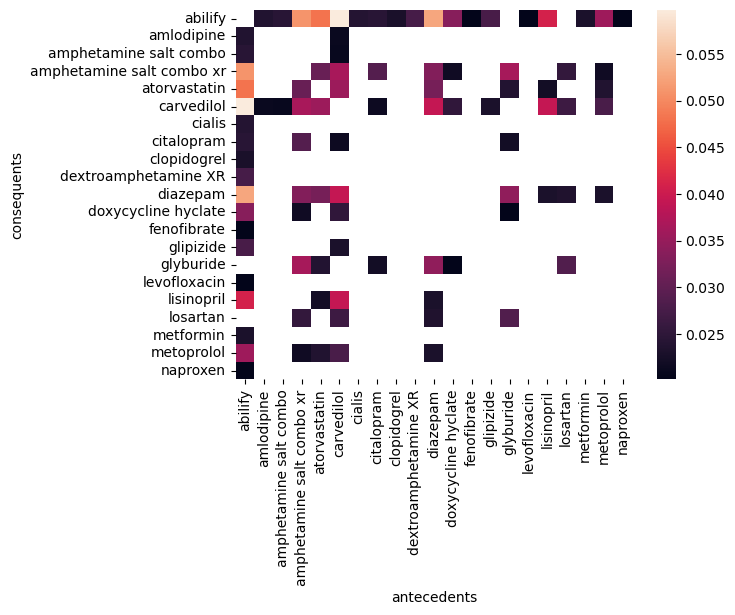

In [19]:
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(support_table)

<Axes: xlabel='antecedent support', ylabel='consequent support'>

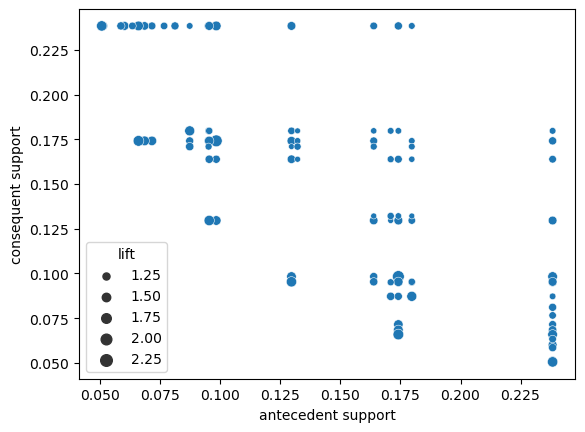

In [20]:
# A scatterplot displays pairs of values - antecedent and consequent support, confidence and lift. 
# No model is assumed. No trend line or curve needed.
# Can provide starting point for pruning. Identify patterns in data and rules. 
# Support vs. confidence
sns.scatterplot(x='antecedent support', y='consequent support', size='lift', data=rules)

What to learn from scatterplots?
1. Identify natural thresholds in data. Not possible with heatmaps or other visualizations.
2. Visualize entire dataset. Not limited to small number of rules.
3. Use findings to prune. Use natural thresholds and patterns to prune. 

In [21]:
print(rules[['antecedents', 'consequents']])

                  antecedents                consequents
0                     abilify                 amlodipine
1                  amlodipine                    abilify
2      amphetamine salt combo                    abilify
3                     abilify     amphetamine salt combo
4   amphetamine salt combo xr                    abilify
5                     abilify  amphetamine salt combo xr
6                atorvastatin                    abilify
7                     abilify               atorvastatin
8                  carvedilol                    abilify
9                     abilify                 carvedilol
10                     cialis                    abilify
11                    abilify                     cialis
12                    abilify                 citalopram
13                 citalopram                    abilify
14                clopidogrel                    abilify
15                    abilify                clopidogrel
16       dextroamphetamine XR  

The top three rules were determined using ‘confidence’ as the primary metric—the metric ranges from zero to one, with the latter implying the most confidence. Confidence explains how likely it is to see that the consequent is purchased, given that the antecedent was purchased (Lim 2022). With confidence scores of between 0.4 – 0.45, it is reasonably probable that Abilify will also be prescribed, given the initial prescriptions of metformin, glipizide, or lisinopril. This is further implicated with lift scores of greater than one, thus indicating the items are positively associated with one another (Lim 2022).

In [22]:
# Can improve over support with additional metrics
# Adding confidence provides a more complete picture
# Support (X&Y) / Support (X)
rules.sort_values('confidence', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
30,metformin,abilify,0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
25,glipizide,abilify,0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
28,lisinopril,abilify,0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127


The support metric measures the share of transactions that contain an itemset. 

number of transactions with item(s)/number of transactions. 

Support measures the basic probability of an event to occur (Lim 2022). It is measured by the proportion of transactions in which an item set appears (Lim 2022). In other words, support (A) is the number of transactions which includes A divided by the total number of transactions (Lim 2022). The top three rules show that metformin and abilify appear together in 2.3% of transactions, glipizide and abilify in 2.7% of transactions, and lisinopril and abilify in 4.0% of transactions.

Lift is the observed to expected ratio (Lim 2022). Lift measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are (Lim 2022). It can be calculated by dividing the probability of both items occurring together by the product of the probabilities of both individual items occurring as if there was no association between them (Lim 2022). A lift of 1 will then mean that both items are independent and without any association (Lim 2022). For any value higher than 1, lift shows that there is an association (Lim 2022). The higher the value, the higher the association (Lim 2022). All the top three rules have lift values greater than one, indicating that the items are positively associated, thus suggesting that the initial prescriptions increase the likelihood of an Abilify prescription. 

The confidence of a consequent event given an antecedent event can be described by using conditional probability (Lim 2022). Simply put, it is the probability of event A happening given that event B has already happened (Lim 2022). This can be used to describe the probability of an item being purchased when another item is already in the basket (Lim 2022). It is measured by dividing the proportion of transactions with item X and Y, over the proportion of transactions with Y (Lim 2022). This value ranges from zero to one, with the latter implying the most confidence. With confidence scores of between 0.4 – 0.45, it is reasonably probable that Abilify will also be prescribed, given the initial prescriptions of metformin, glipizide, or lisinopril. 


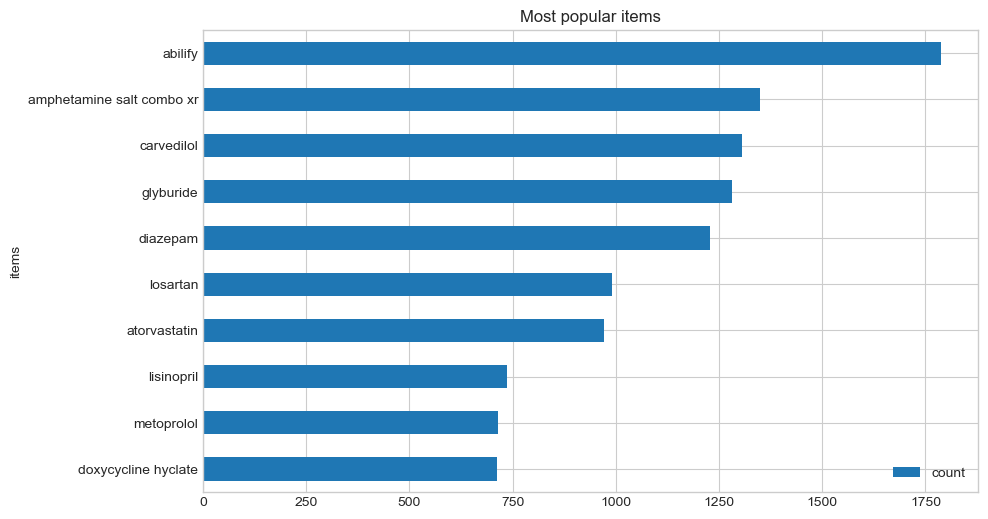

In [23]:
#most popular single items
count = items.loc[:, :].sum()
pop_item = count.sort_values(ascending=False).head(10)  # removed the '0'
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns={"index": "items", 0: "count"})

#Data Visualization
plt.rcParams['figure.figsize'] = (10, 6)
#matplotlib.style.use('dark_background')
plt.style.use('seaborn-v0_8-whitegrid')  # Prefer the light background
ax = pop_item.plot.barh(x='items', y='count')
plt.title('Most popular items')
plt.gca().invert_yaxis()